# Trying to understand Trevor's interfaces

In [222]:
%matplotlib inline

In [113]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

## Parabolic energy wells

In [46]:
def f_gen(C, a, C0, f0):
    return (1./(4*a)) * (C - C0)**2 + f0

In [47]:
def dfdC_gen(C, a, C0):
    return (1./(2*a)) * (C - C0)

In [48]:
def fS(C):
    return f_gen(C, a=aS, C0=C0S, f0=f0S)

In [49]:
def dfSdC(C):
    return dfdC_gen(C, a=aS, C0=C0S)

In [50]:
def fL(C):
    return f_gen(C, a=aL, C0=C0L, f0=f0L)

In [51]:
def dfLdC(C):
    return dfdC_gen(C, a=aL, C0=C0L)

## Equilibrium

Determined by common tangent:
$$\left.\frac{\partial f_S}{\partial C_S}\right|_{C_S^{eq}} = \left.\frac{\partial f_L}{\partial C_L}\right|_{C_L^{eq}}$$
$$\left.f_L\right|_{C_L^{eq}} = \left.f_S\right|_{C_S^{eq}} + \left(C_L^{eq} - C_S^{eq}\right)\left.\frac{\partial f_S}{\partial C_S}\right|_{C_S^{eq}} $$

In [150]:
def equilibrium(C):
    return [dfSdC(C[0]) - dfLdC(C[1]),
            fL(C[1]) - fS(C[0]) - (C[1] - C[0]) * dfSdC(C[0])]

## Fictitious compositions

Determined by parallel tangent
$$\left.\frac{\partial f_S}{\partial C_S}\right|_{C_S} = \left.\frac{\partial f_L}{\partial C_L}\right|_{C_L}$$
and relation between system composition and fictitious compositions
$$C = h(\phi) C_S + [1 - h(\phi)] C_L$$

### Numerical solution

In [180]:
def fictitious(x, *args):
    CS, CL = x
    C, phi = args
    return [dfSdC(CS) - dfLdC(CL),
            C - h(phi) * CS - (1 - h(phi)) * CL]

### Analytical solution

In [33]:
def CL(C, phi):
    return (aL * C + h(phi) * (aS * C0L - aL * C0S))/(aS * h(phi) + aL * (1 - h(phi)))

In [34]:
def CS(C, phi):
    return (aS * C - (1 - h(phi)) * (aS * C0L - aL * C0S))/(aS * h(phi) + aL * (1 - h(phi)))

## Plot free energy and common tangent

In [147]:
aL = 0.001
C0L = 0.8
f0L = 0.
aS = 1.0
C0S = 0.4
f0S = 0.1

In [151]:
CSeq, CLeq = fsolve(func=equilibrium, x0=(0., 0.8))
print (CSeq, CLeq)

(0.05158741903762879, 0.7996515874190376)


In [148]:
C = np.linspace(0, 1, 100)

(0, 1)

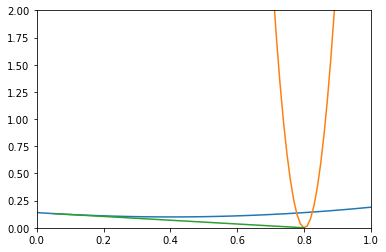

In [152]:
plt.plot(C, fS(C), C, fL(C))
plt.plot([CSeq, CLeq], [fS(CSeq), fL(CLeq)])
plt.ylim(0, 2)
plt.xlim(0, 1)

### Interpolators

In [35]:
def h(phi):
    return phi

In [85]:
def g(phi):
    return phi**2 * (1 - phi)**2

### System free energy

In [86]:
def f(C, phi):
    return h(phi) * fS(CS(C, phi)) + (1 - h(phi)) * fL(CL(C, phi)) + w * g(phi)

## Plot hypothetical interfaces

In [153]:
x = np.linspace(-1, 1, 100)

### Equilibrium

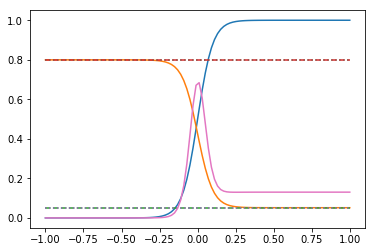

In [220]:
d = .05
w = 10.
CS0, CL0 = CSeq, CLeq
phi = 0.5 * (1 + np.tanh(x/(2*d)))
plt.plot(x, phi)
C = h(phi) * CS0 + (1 - h(phi)) * CL0
CSfic, CLfic = np.array([fsolve(func=fictitious, x0=(0.5, 0.5), args=(Cval, phival)) for Cval, phival in zip(C, phi)]).T
plt.plot(x, C)
plt.plot(x, CSfic, linestyle="--")
plt.plot(x, CLfic, linestyle="--")
plt.plot(x, CS(C, phi), linestyle=":")
plt.plot(x, CL(C, phi), linestyle=":")
plt.plot(x, f(C, phi))

### Slightly depleted liquid

In [218]:
C0 = 0.79961
phi0 = 0.
CL0 = CL(C=C0, phi=phi0)
CS0 = CS(C=C0, phi=phi0)
print (CS0, CL0)

(0.00999999999995449, 0.79961)


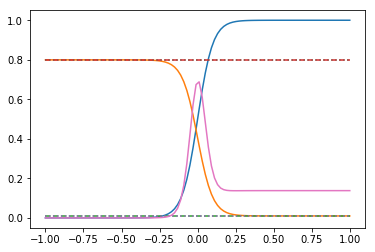

In [219]:
d = .05
w = 10.
phi = 0.5 * (1 + np.tanh(x/(2*d)))
plt.plot(x, phi)
C = h(phi) * CS0 + (1 - h(phi)) * CL0
CSfic, CLfic = np.array([fsolve(func=fictitious, x0=(0.5, 0.5), args=(Cval, phival)) for Cval, phival in zip(C, phi)]).T
plt.plot(x, C)
plt.plot(x, CSfic, linestyle="--")
plt.plot(x, CLfic, linestyle="--")
plt.plot(x, CS(C, phi), linestyle=":")
plt.plot(x, CL(C, phi), linestyle=":")
plt.plot(x, f(C, phi))

### Slightly enriched liquid

In [216]:
C0 = 0.79999
phi0 = 0.
CL0 = CL(C=C0, phi=phi0)
CS0 = CS(C=C0, phi=phi0)
print (CS0, CL0)

(0.38999999999989043, 0.79999)


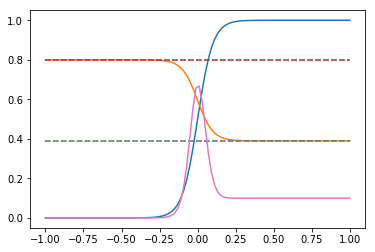

In [217]:
d = .05
w = 10.
phi = 0.5 * (1 + np.tanh(x/(2*d)))
plt.plot(x, phi)
C = h(phi) * CS0 + (1 - h(phi)) * CL0
CSfic, CLfic = np.array([fsolve(func=fictitious, x0=(0.5, 0.5), args=(Cval, phival)) for Cval, phival in zip(C, phi)]).T
plt.plot(x, C)
plt.plot(x, CSfic, linestyle="--")
plt.plot(x, CLfic, linestyle="--")
plt.plot(x, CS(C, phi), linestyle=":")
plt.plot(x, CL(C, phi), linestyle=":")
plt.plot(x, f(C, phi))

### Very depleted liquid

In [223]:
C0 = 0.7
phi0 = 0.
CL0 = CL(C=C0, phi=phi0)
CS0 = CS(C=C0, phi=phi0)
print (CS0, CL0)

(-99.60000000000014, 0.7)


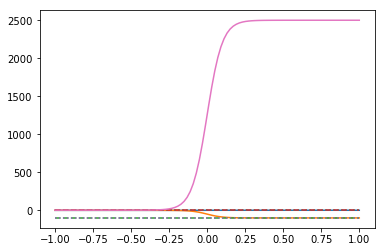

In [224]:
d = .05
w = 10.
phi = 0.5 * (1 + np.tanh(x/(2*d)))
plt.plot(x, phi)
C = h(phi) * CS0 + (1 - h(phi)) * CL0
CSfic, CLfic = np.array([fsolve(func=fictitious, x0=(0.5, 0.5), args=(Cval, phival)) for Cval, phival in zip(C, phi)]).T
plt.plot(x, C)
plt.plot(x, CSfic, linestyle="--")
plt.plot(x, CLfic, linestyle="--")
plt.plot(x, CS(C, phi), linestyle=":")
plt.plot(x, CL(C, phi), linestyle=":")
plt.plot(x, f(C, phi))

### Very enriched solid

In [214]:
C0 = 0.9
phi0 = 1.
CL0 = CL(C=C0, phi=phi0)
CS0 = CS(C=C0, phi=phi0)
print (CS0, CL0)

(0.9, 0.8005000000000001)


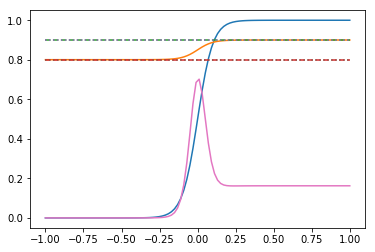

In [215]:
d = .05
w = 10.
phi = 0.5 * (1 + np.tanh(x/(2*d)))
plt.plot(x, phi)
C = h(phi) * CS0 + (1 - h(phi)) * CL0
CSfic, CLfic = np.array([fsolve(func=fictitious, x0=(0.5, 0.5), args=(Cval, phival)) for Cval, phival in zip(C, phi)]).T
plt.plot(x, C)
plt.plot(x, CSfic, linestyle="--")
plt.plot(x, CLfic, linestyle="--")
plt.plot(x, CS(C, phi), linestyle=":")
plt.plot(x, CL(C, phi), linestyle=":")
plt.plot(x, f(C, phi))